# D.C. Residential Properties Data

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-2 project on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Predict house price, given all the other metrics. <br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Regression task, since we need to predict a value.</li>
    <li>Multiple regression problem since the system will use multiple features to make a prediction.</li>
    <li>Univariate regression problem since we are only trying to predict a single value.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Possible Performance Measure:** Root Mean Square Error (RMSE), and Mean Absolute Error (MAE). <br>
**Data:** [DC Residential Properties | Kaggle](https://www.kaggle.com/christophercorrea/dc-residential-properties)<br>
**Project Author:** Maksim Ekin Eren

## Take a Look at the Data
First, lets load the data and gain some insight about it.

In [430]:
import pandas as pd 
import os

def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

housing = load_data("data", "DC_Properties.csv")
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [431]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

There are 158957 instances, however; some attributes have missing values. This means we will have to deal with missing data later. Data consist of mix of integer, float, and object types. Because we loaded a csv, we know that object values are actually text. They are possibly categorical data. Next, lets discover what categories exist for each possible categorical attribute:

In [432]:
housing["HEAT"].value_counts()

Forced Air        53972
Hot Water Rad     47202
Warm Cool         33628
Ht Pump           21412
Wall Furnace       1120
Water Base Brd      402
Elec Base Brd       351
No Data             330
Electric Rad        144
Gravity Furnac      140
Air-Oil             117
Evp Cool             50
Ind Unit             50
Air Exchng           39
Name: HEAT, dtype: int64

We can see here that although there isn't missing row, we might encounter instances such as "No Data" that will have to be treated as missing data. Lets continue to look at all the categorical attributes:

In [433]:
housing["AC"].value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

Same issue on this attribute. We have instances with "0" that will have to be treated as missing data.

In [434]:
housing["STYLE"].value_counts()

2 Story            81137
3 Story             9449
2.5 Story Fin       7000
1 Story             4420
1.5 Story Fin       2655
2.5 Story Unfin      729
4 Story              369
Split Level          303
Split Foyer          279
3.5 Story Fin        133
1.5 Story Unfin      112
Default               65
Bi-Level              19
4.5 Story Fin         13
3.5 Story Unfin        8
Vacant                 2
4.5 Story Unfin        2
Outbuildings           1
Name: STYLE, dtype: int64

In [435]:
housing["STRUCT"].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

In [436]:
housing["GRADE"].value_counts()

Average          37357
Above Average    32101
Good Quality     20800
Very Good         8976
Excellent         3390
Superior          2634
Exceptional-A      818
Exceptional-B      278
Fair Quality       150
Exceptional-C       92
Exceptional-D       75
No Data             19
Low Quality          6
Name: GRADE, dtype: int64

In [437]:
housing["CNDTN"].value_counts()

Average      58217
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64

In [438]:
housing["EXTWALL"].value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
SPlaster              1
Rustic Log            1
Name: EXTWALL, dtype: int64

In [439]:
housing["ROOF"].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

In [440]:
housing["INTWALL"].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Lt Concrete        141
Default            110
Ceramic Tile        50
Vinyl Comp          28
Parquet             19
Resiliant           15
Vinyl Sheet         13
Terrazo              6
Name: INTWALL, dtype: int64

In [441]:
housing["ASSESSMENT_NBHD"].value_counts()

Old City 2                      15978
Old City 1                      15000
Columbia Heights                 9474
Brookland                        6568
Petworth                         6323
Deanwood                         5983
Chevy Chase                      5354
Congress Heights                 4729
Brightwood                       4112
Mt. Pleasant                     4052
Capitol Hill                     3830
Georgetown                       3774
Hillcrest                        3734
Randle Heights                   3517
Fort Dupont Park                 3425
Kalorama                         3207
Central-tri 1                    3132
Cleveland Park                   3032
Trinidad                         2964
Southwest Waterfront             2828
Riggs Park                       2795
Woodridge                        2748
American University              2594
Central-tri 3                    2500
Eckington                        2328
Forest Hills                     2225
16th Street 

In [442]:
housing["ASSESSMENT_SUBNBHD"].value_counts()

040 D Old City 2       4403
040 E Old City 2       2968
040 C Old City 2       2886
042 B Petworth         2763
039 K Old City 1       2640
                       ... 
050 A Spring Valley     176
004 C Berkley           154
025 A Georgetown        140
050 D Spring Valley     131
025 C Georgetown         91
Name: ASSESSMENT_SUBNBHD, Length: 121, dtype: int64

In [443]:
housing["WARD"].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

In [444]:
housing["QUADRANT"].value_counts()

NW    89736
NE    37675
SE    27224
SW     4085
Name: QUADRANT, dtype: int64

Now lets drop the attributes that we won't need.

In [445]:
housing.drop(["GIS_LAST_MOD_DTTM","CITY","STATE","CENSUS_BLOCK","CENSUS_TRACT",
              "SQUARE","Unnamed: 0","SALEDATE", "QUALIFIED", "SALE_NUM", "BLDG_NUM",
             "USECODE", "SOURCE", "CMPLX_NUM", "FULLADDRESS", "NATIONALGRID","X","Y",
             "LIVING_GBA", "NUM_UNITS", "YR_RMDL"],
            axis=1,
            inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 28 columns):
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
PRICE                 98216 non-null float64
GBA                   106696 non-null float64
STYLE                 106696 non-null object
STRUCT                106696 non-null object
GRADE                 106696 non-null object
CNDTN                 106696 non-null object
EXTWALL               106696 non-null object
ROOF                  106696 non-null object
INTWALL               106696 non-null object
KITCHENS              106695 non-null float64
FIREPLACES            158957 non-nu

Now we simplified out data and get rid of the attributes that we won't need; however, there may still be attributes that we can take out of our dataset. At this point. I don't want to delete any attribute before making sure. As a result, we may take soem attributes out after we gain more insights on our data. 

Another important point we need to think is that it seems some of the float and intiger values are also categorical data. For example, zipcode can be used as a categorical data. 

Next, lets gain some insight for the numerical data:

In [446]:
housing.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,EYB,STORIES,PRICE,GBA,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE
count,158957.000000,158957.000000,158957.000000,158957.000000,158686.000000,158957.000000,106652.000000,9.821600e+04,106696.000000,106695.000000,158957.000000,158957.000000,158956.000000,158956.000000,158956.000000
mean,1.810678,0.458237,6.187736,2.732506,1941.987579,1963.718024,2.091793,9.313516e+05,1714.539889,1.219251,2.374674,2473.282158,20012.694563,38.914854,-77.016676
std,0.976396,0.587571,2.618165,1.358864,33.640234,24.923150,2.933323,7.061325e+06,880.677860,0.621170,737.295595,5059.046023,15.627084,0.031723,0.040938
min,0.000000,0.000000,0.000000,0.000000,1754.000000,1800.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,20001.000000,38.819731,-77.113909
25%,1.000000,0.000000,4.000000,2.000000,1918.000000,1954.000000,2.000000,2.400000e+05,1190.000000,1.000000,0.000000,697.000000,20007.000000,38.895425,-77.042892
50%,2.000000,0.000000,6.000000,3.000000,1937.000000,1963.000000,2.000000,3.999990e+05,1480.000000,1.000000,0.000000,1649.000000,20011.000000,38.915337,-77.019596
75%,2.000000,1.000000,7.000000,3.000000,1960.000000,1975.000000,2.000000,6.520000e+05,1966.000000,1.000000,1.000000,3000.000000,20018.000000,38.936075,-76.988626
max,14.000000,11.000000,48.000000,24.000000,2019.000000,2018.000000,826.000000,1.374275e+08,45384.000000,44.000000,293920.000000,942632.000000,20392.000000,38.995540,-76.909758


In [447]:
housing["ZIPCODE"].value_counts()

20011.0    16352
20002.0    16310
20009.0    13171
20019.0    12458
20016.0    10644
20001.0    10549
20020.0     9805
20007.0     9029
20003.0     8015
20008.0     6801
20010.0     6428
20018.0     5670
20017.0     5622
20015.0     5337
20032.0     5111
20012.0     4118
20037.0     3730
20005.0     3404
20024.0     3105
20036.0     1892
20004.0     1082
20392.0      186
20006.0      118
20052.0       19
Name: ZIPCODE, dtype: int64

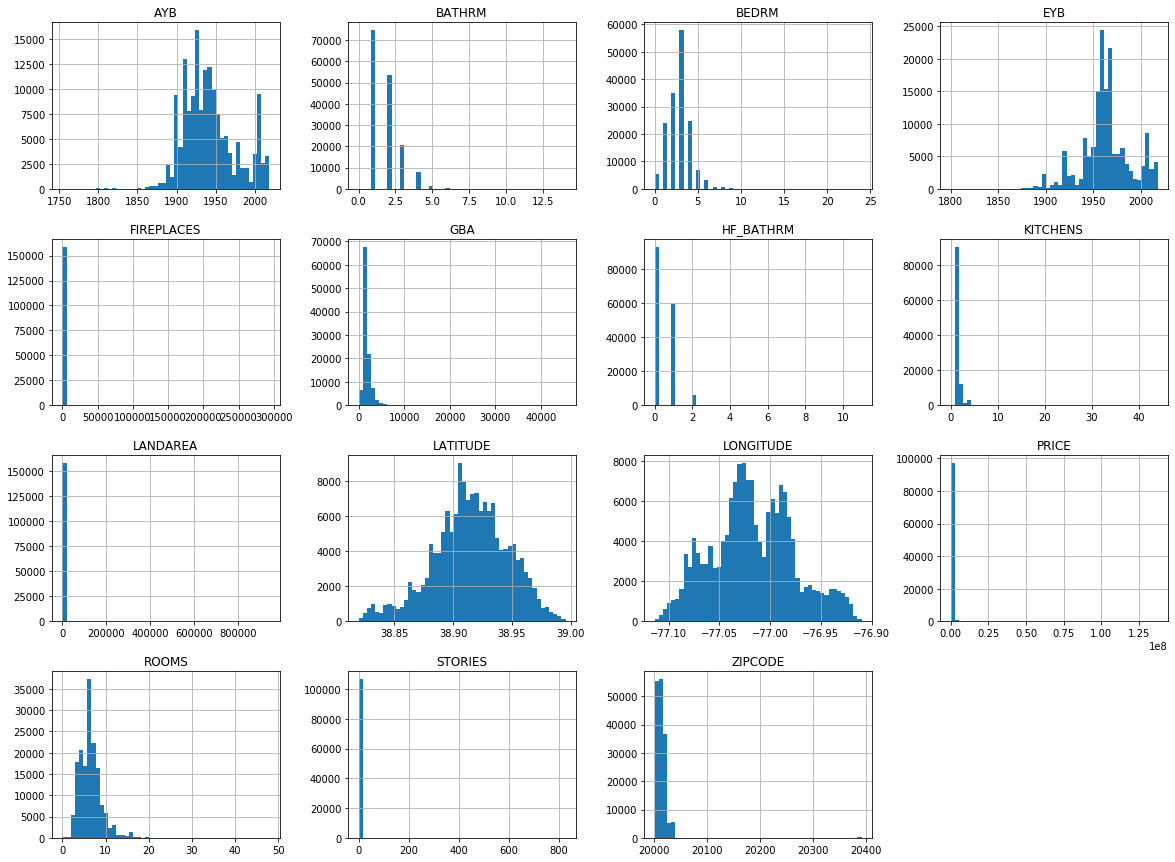

In [448]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

Next, before continuing discovering more about the dataset, lets create a test set to avoid data snooping bias. I will use Scikit-Learn's random test train split to create the sets:

In [449]:
from sklearn.model_selection import train_test_split

# first drop the labels that are missing
housing.dropna(subset=["PRICE"], inplace=True)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

78572
19644


## Discover and Visualize the Data
First lets create a copy of the training set so we don't damage it accidently:

In [450]:
housing = train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78572 entries, 33900 to 26652
Data columns (total 28 columns):
BATHRM                78572 non-null int64
HF_BATHRM             78572 non-null int64
HEAT                  78572 non-null object
AC                    78572 non-null object
ROOMS                 78572 non-null int64
BEDRM                 78572 non-null int64
AYB                   78479 non-null float64
EYB                   78572 non-null int64
STORIES               46276 non-null float64
PRICE                 78572 non-null float64
GBA                   46303 non-null float64
STYLE                 46303 non-null object
STRUCT                46303 non-null object
GRADE                 46303 non-null object
CNDTN                 46303 non-null object
EXTWALL               46303 non-null object
ROOF                  46303 non-null object
INTWALL               46303 non-null object
KITCHENS              46302 non-null float64
FIREPLACES            78572 non-null int64
LANDAREA

Now lets try to visulize the data:

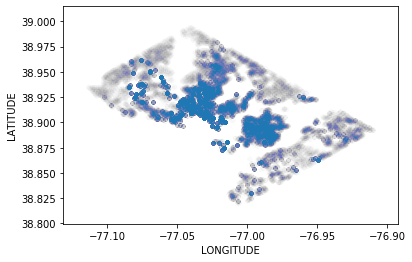

In [451]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.005)

Now we can see the density of the Residential Properties. Lets try this with heat map to discover more patterns. Lets strat with prices:

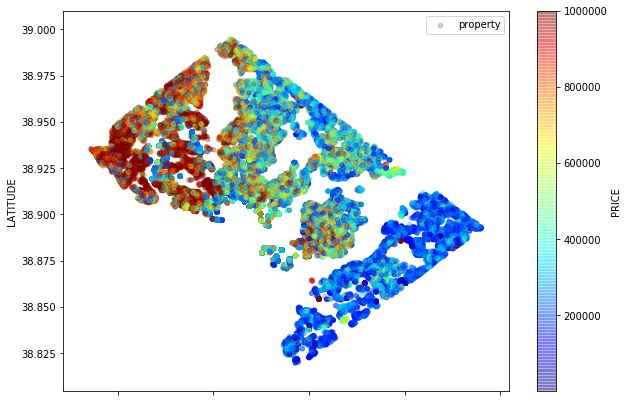

In [452]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True, vmax=1000000)
plt.legend()

Let's try to plot the heatmap on a DC map:

In [453]:
print(housing["LATITUDE"].min())
print(housing["LATITUDE"].max())
print(housing["LONGITUDE"].min())
print(housing["LONGITUDE"].max())

38.81973129
38.99479729
-77.11390873
-76.90975796


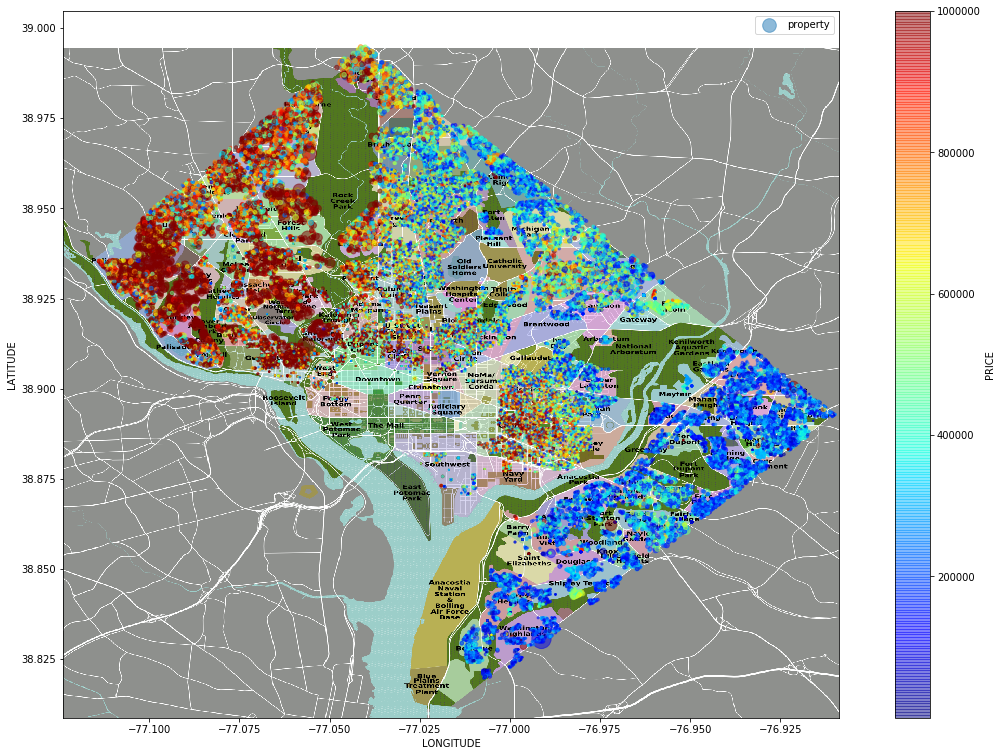

In [454]:
import urllib

#loading the png DC image found on Google
image=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/9/93/DC_neighborhoods_map.png')
dc_img=plt.imread(image)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(dc_img,zorder=0,extent=[-77.12390873, -76.90875796, 38.80873129, 38.9943352])
ax=plt.gca()

#using scatterplot
housing.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5,
            label="property", figsize=(20,13),
            ax=ax,
            s=housing["LANDAREA"]/500,
            c="PRICE", cmap=plt.get_cmap("jet"), 
            colorbar=True, zorder=5, vmax=1000000)


plt.legend()
plt.show()

Here, color represents the residential price, and the radious of the circle represents the land area of the property.<br>We can also see the landarea by itself:

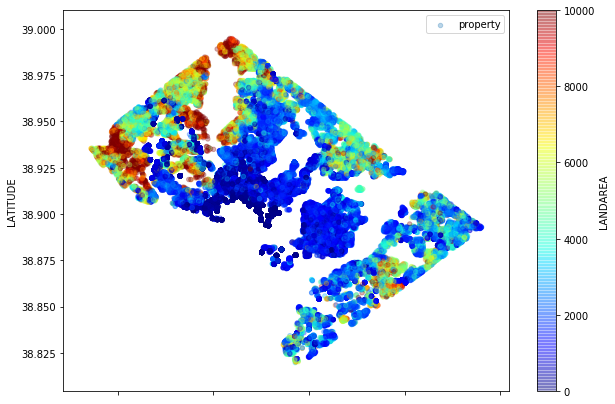

In [455]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="LANDAREA", cmap=plt.get_cmap("jet"), colorbar=True, vmax=10000)
plt.legend()

## Looking for Correlations

In [456]:
corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE         1.000000
GBA           0.599141
AYB           0.054913
EYB           0.049512
LATITUDE      0.044466
KITCHENS      0.042149
STORIES       0.040251
FIREPLACES    0.003969
ZIPCODE       0.001434
LANDAREA     -0.002923
BATHRM       -0.004369
HF_BATHRM    -0.011762
ROOMS        -0.036131
BEDRM        -0.041286
LONGITUDE    -0.095047
Name: PRICE, dtype: float64

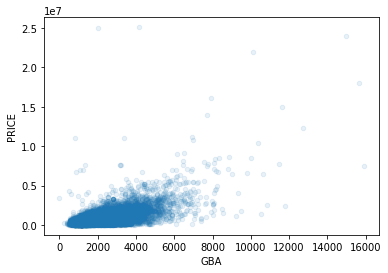

In [457]:
housing.plot(kind="scatter", x="GBA", y="PRICE", alpha=0.1)

### Lets Try Few Attribute Combinations

In [458]:
housing["bedrooms_per_room"]    = housing["BEDRM"] / housing["ROOMS"]
housing["bathrooms_per_room"]   = housing["BATHRM"] / housing["ROOMS"]
housing["rooms_per_stories"]    = housing["ROOMS"] / housing["STORIES"]
housing["kitchens_per_room"]    = housing["KITCHENS"] / housing["ROOMS"]
housing["kitchens_per_stories"] = housing["KITCHENS"] / housing["STORIES"]
housing["kitchens_per_gba"]     = housing["KITCHENS"] / housing["GBA"]
housing["gba_per_room"]         = housing["GBA"] / housing["ROOMS"]
housing["gba_per_stories"]      = housing["GBA"] / housing["STORIES"]

corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                   1.000000
GBA                     0.599141
gba_per_stories         0.479448
gba_per_room            0.438069
rooms_per_stories       0.139126
AYB                     0.054913
EYB                     0.049512
LATITUDE                0.044466
KITCHENS                0.042149
STORIES                 0.040251
bathrooms_per_room      0.039548
FIREPLACES              0.003969
ZIPCODE                 0.001434
LANDAREA               -0.002923
BATHRM                 -0.004369
HF_BATHRM              -0.011762
ROOMS                  -0.036131
BEDRM                  -0.041286
bedrooms_per_room      -0.042794
kitchens_per_stories   -0.046094
LONGITUDE              -0.095047
kitchens_per_room      -0.139981
kitchens_per_gba       -0.296140
Name: PRICE, dtype: float64

## Pre-processing

We are going to handle missing data, handle categorical data including "Zipcode".<br>Also, we need to handle the year attributes that wouldn't make sense at itself such as; AYB, EYB. 

AYB is "The earliest time the main portion of the building was built".<br>
EYB is "The year an improvement was built more recent than actual year built".

We will substract the current year from each instance for these attributes.

Categorical attributes that we will handle includes: ZIPCODE, HEAT, AC, STYLE, STRUCT, GRADE, CNDTN, EXTWALL, ROOF,  INTWALL, ASSESSMENT_NBHD, ASSESSMENT_SUBNBHD, WARD, QUADRANT

Start with clean dataset and, seperate the labels and predicators.

In [459]:
# seperate labels and predicators
housing = train_set.drop("PRICE", axis=1)
housing_labels = train_set["PRICE"].copy()

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78572 entries, 33900 to 26652
Data columns (total 27 columns):
BATHRM                78572 non-null int64
HF_BATHRM             78572 non-null int64
HEAT                  78572 non-null object
AC                    78572 non-null object
ROOMS                 78572 non-null int64
BEDRM                 78572 non-null int64
AYB                   78479 non-null float64
EYB                   78572 non-null int64
STORIES               46276 non-null float64
GBA                   46303 non-null float64
STYLE                 46303 non-null object
STRUCT                46303 non-null object
GRADE                 46303 non-null object
CNDTN                 46303 non-null object
EXTWALL               46303 non-null object
ROOF                  46303 non-null object
INTWALL               46303 non-null object
KITCHENS              46302 non-null float64
FIREPLACES            78572 non-null int64
LANDAREA              78572 non-null int64
ZIPCODE   

### Handle Missing Data


In [460]:
# get the numerical values
housing_num = housing.drop(["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD",
                            "WARD","QUADRANT","ZIPCODE"], axis=1)

# get categorical values
housing_cat = housing[["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD",
                            "WARD","QUADRANT","ZIPCODE"]]

housing_cat.head(5)

,HEAT,AC,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,WARD,QUADRANT,ZIPCODE
33900,Hot Water Rad,Y,2 Story,Semi-Detached,Good Quality,Average,Brick/Stucco,Slate,Hardwood,North Cleveland Park,NaN,Ward 3,NW,20008.0
78902,Warm Cool,Y,2.5 Story Fin,Single,Above Average,Average,Common Brick,Comp Shingle,Hardwood,Michigan Park,NaN,Ward 5,NE,20018.0
149535,Forced Air,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old City 2,040 B Old City 2,Ward 6,NW,20001.0
157268,Ht Pump,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central-tri 3,NaN,Ward 2,NW,20004.0
50441,Forced Air,Y,2 Story,Row Inside,Average,Very Good,Common Brick,Metal- Sms,Hardwood,Petworth,042 B Petworth,Ward 4,NW,20011.0


In [461]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numerical values pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# categorical values pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder()),
])

# get attributes
num_attribs = list(housing_num)
cat_attribs = ["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD",
                            "WARD","QUADRANT","ZIPCODE"]

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# prepare the data
housing_prepared = full_pipeline.fit_transform(housing)

## Train Models and Evaluate on the Training Set
### Linear Regression Model
First, lets train a Linear Regression Model

In [462]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [466]:
def prediction_test(model):
    some_data = housing.iloc[:5] # Purely integer-location based indexing for selection by position
    some_labels = housing_labels.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)

    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:", list(some_labels))

Measure the RMSE on the training set

In [464]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6442929.411316074

### Decision Tree Model

In [467]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) # train

# evaluate
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

prediction_test(tree_reg)

Predictions: [849000.         432410.         387225.76136364 616366.66666667
 585000.        ]
Labels: [849000.0, 432410.0, 427500.0, 670000.0, 585000.0]


In [468]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [4630218.15070067 4383122.75289956 4262853.88784387 5692948.92914248
 4692063.25913921 4130162.02477846 3635695.35164787 5094393.80202006
 4004920.59795419 4961254.67020534]
Mean: 4548763.342633171
Standard deviation: 567279.3203928214


Current error is 4,548,763 +- 567,279 <br> Must work on choosing better features.